In [13]:
import numpy as np
#we import numpy here for it's mathematical functions on arrays and multidimensional arrays
#we mostly use it here to arrange the labels on the confusion matrix.
#numpy is also used for the manipulation of array and it has functions that can contribute with mathematical equations such as linear algebra.

import cv2
#cv2 is a python library used for image processing. It can perform functions like filtering, object recognition, etc..
#cv2 allows users to develop, read, write, and manipulate the images with ease. 
#This import supports real-time image processing for application with advanced visions. It also 
#supports machine learning models that is widely used in robotics.

import matplotlib.pyplot as plt
#matplotlib is mostly used for the creation and visualization of graphs.
#matplotlib is the standard for most graphing and plotting in python
#it works by creating figures and plots and graphs inside the figures which we can add data to.

import pandas as pd 
#Pandas is a python library that is mostly used for its ability to examine, clean, analyze, and modify data within the dataframe.
#this is an import for adding the dataframes we will manipulate and it also displays data in tabular form

In [14]:
img = cv2.imread("6p.jpg", cv2.IMREAD_COLOR)
#This line of code reads the image in color mode that has a default format of BGR(Blue, Green, Red)
#IMREAD_COLOR specifies that the image should be read in color mode. The Integer 1 can also
#be used instead of cv2.IMREAD_COLOR, both of them are the same.

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#The cvtColor() function converts an image from one color space to another and there are 150 color-space conversions available.
#In this case we converted the BGR to an RGB color space.
#Color would seem inverted/incorrect when visualizing with non-OpenCV if the conversion is not applied.

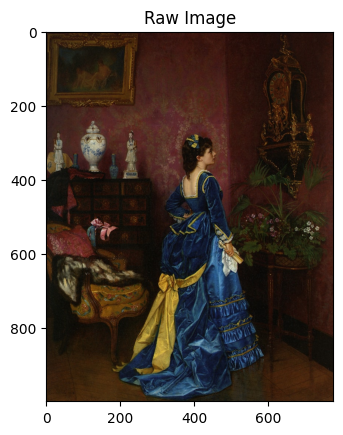

In [15]:
plt.title('Raw Image')
#This line of code adds a title on the uppermost part of the image.
#We used this to label the image to avoid confusion in preprocessing.

plt.imshow(img)
#This line of code load and shows the image to the screen.
#We used this to confirm if the image exists and is loadable.

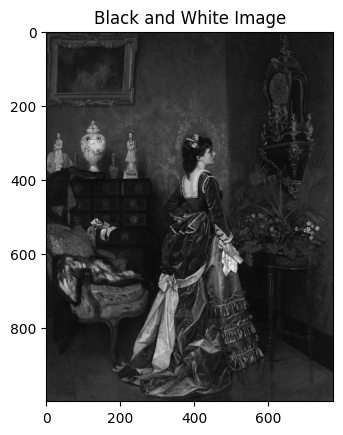

In [16]:
img_bnw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# There are 150 color-space conversions available, and the cvtColor() function can change an image's color space.
# In this instance, the BGR was changed to a grayscale color space.

plt.title('Black and White Image')
#This line of code adds a title on the uppermost part of the image.
#We used this to label the image to avoid confusion in preprocessing.

plt.imshow(img_bnw, cmap="gray")
#We used this in order to confirm if the image is really converted into a gray color space.
#This line of code also loads and shows the image to the screen.

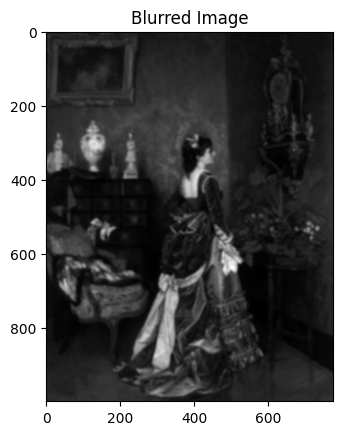

In [17]:
img_blur = cv2.GaussianBlur(img_bnw, (15, 15), 0)
#cv2.GaussianBlur is a method that is used to make an image smoother by reducing its noise and detail
#The parameters define how much blur does it have in the x and y direction. the '0' states that
#OpenCV would automaticlly caclulate the standart deviation based on its kernel size.

plt.title('Blurred Image')
#This line of code adds a title on the uppermost part of the image.
#We used this to label the image to avoid confusion in preprocessing.

plt.imshow(img_blur, cmap = "gray")
#We used this to confirm if the Gaussian Blur is applied to the image. As we can see
#the image is blurred our resulting into a smoother texture.
#This line of code also loads and shows the image to the screen.

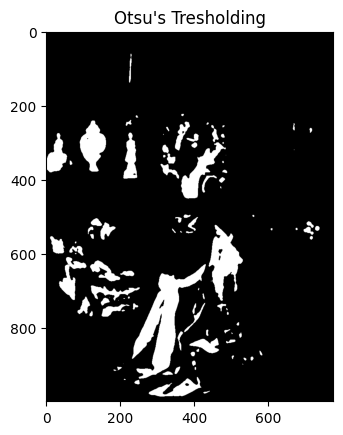

In [18]:
ret, thresh_otsu = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#Otsu's Tresholding separates the image into two classes which is Foreground and Background.
#It finds a point between dark and bright pixels and where is it clearest. 
#This line of code finds the best treshold value automatically by analyzing the histogram. 
#It minimizes the variance of each classes which results in an optimal image segmentation.

plt.title('Otsu\'s Tresholding')
#This line of code adds a title on the uppermost part of the image.
#We used this to label the image to avoid confusion in preprocessing.

plt.imshow(thresh_otsu, cmap = "gray")
#We used this in order to confirm if the Otsu Tresholding is applied. As we can see in the image below, 
#it looks black and white which is the binary version of a grayscale image.
#We can also see that it separates the image into two parts being foreground and background.
#This line of code also loads and shows the image to the screen.

# What is the ret value in the cv2.threshold output, and what does THRESH_OTSU do? How might using THRESH_BINARY_INV change the output?
- ret stores the actual threshold value for the image, the intensity value that separates what is black and what is white. In simple binary thresholding like TRESH_OTSU, THRESH_BINARY and THRESH_BINARY_INV, we need to manually set a threshold value. Otsu's method specifically,  automatically calculates a treshold value for the image. For the specific case of THRESH_BINARY_INV, all intensity values less than the threshold is white and all values greater is black.

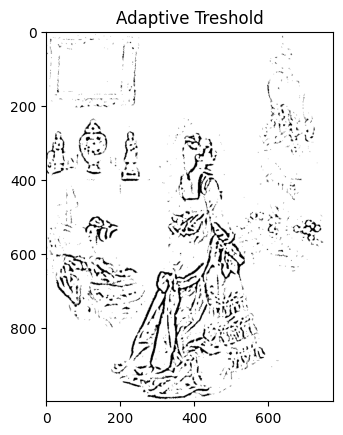

In [19]:
thresh_adaptive = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
#This line of code applies the adaptive tresholding function using te Gaussian model to convert 
#a blurred image that is also in grayscale into a binary image.
#The reason we ned this is to fix Uneven Lighting, and improvements for feature detection, etc...

plt.title('Adaptive Treshold')
#This line of code adds a title on the uppermost part of the image.
#We used this to label the image to avoid confusion in preprocessing.

plt.imshow(thresh_adaptive, cmap = "gray")
#We used this to confirm if the Adaptive Treshold function is applied. As we can see in the image below,
#Sharp edges and features are highlighted even in areas where there is uneven lighting..
#This line of code also loads and shows the image to the screen.

# When would you use adaptive thresholding instead of simple (Otsu's) thresholding? Explain the roles of blockSize and C in adaptiveThreshold. 

- Adaptive Thresholding unlike methods like Otsu's have their threshold value based on the local area rather than a single threshold for the whole image. This is useful for images with uneven lighting. 
Adaptive thresholding works by cutting up the image into smaller sections and finding thresholds for that area. the blockSize is what defines the size of that area. For every pixel, a threshold is calculated based on the mean of the surrounding pixels.
The C value tunes the sensitivity of the mean threshold by subtracting some value from it, decreasing the C makes the overall threshold lower and increasing it makes it higher.


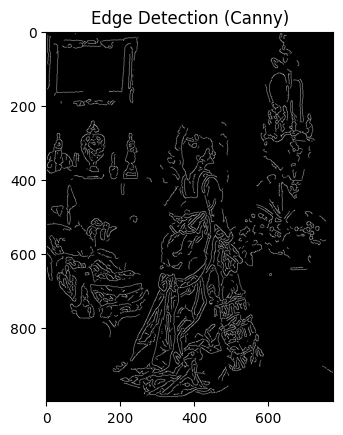

In [20]:
edges = cv2.Canny(img_blur,5, 30)
#This line of codee detects the edges of an image. It does it by the sharp changes in intensity such as outlines.
#This fins the edges in te blurred image which would identify and isolate the shapes for further processing.

plt.title('Edge Detection (Canny)')
#This line of code adds a title on the uppermost part of the image.
#We used this to label the image to avoid confusion in preprocessing.

plt.imshow(edges, cmap = "gray")
#We used this to confirm if the Edge Detection(Canny) is applied. As we can see in the image below,
#The edges are clearnly outlined. It highlighted the areas with strong intensity changes.
#This line of code also loads and shows the image to the screen.

# Describe the multi-stage process of the Canny edge detector. What is the significance of the two threshold values (threshold1 and threshold2)?
1. The first stage is Noise Reduction - to smoothen the image.
2. The second stage is Gradient Calculation - to calculate edge strangth and direction.
3. The Third stage is  Non-Maximum Suppression - it removes false edges which results in binary image with thin edges.
4. The fourth stage is Double Tresholding - it classifies which edges are either strong weak or non-relevant.
5. The fifth stage is Edge Tracking - it decides which edges are to keep and discard.

#### (since our parameter is 5-30)
- The parameters state that pixel gradient greater that 30 are strong edges and are kept.
- pixel gradient less than 5 are discarded.
- pixels between 5 and 30 are week edges and the may be kept.
- These are important because gradients less than 5 are usually the ones with noise or small texture details.
- gradients greater than 30 are most likey be important features and are objects that must be kept.
- gradients between 5-30 are weak edges and may be discarded unless they are attached to a strong edge.

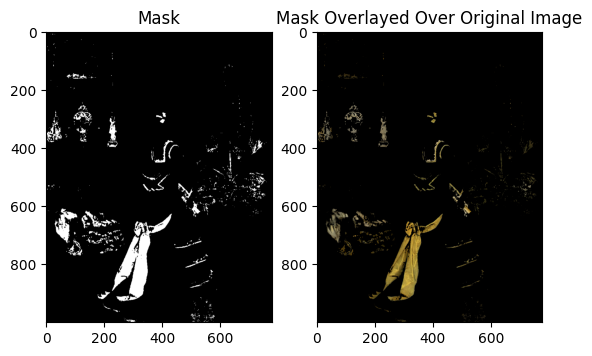

In [21]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#This line of code converts the image from RGB to HSV.
#HSV stands for Hue (The color), Saturation, and Value (How intense it is).
#This also makes it easier to isolate color ranges.

H_lower, H_higher = 20, 30
#This line of code isolate a range of 20 to 30 in the hue field.
#This is about a yellowish town, csv's range of colors is from 0 to 179 rather than 360.

S_lower, S_higher = 48, 255
#Here the saturation value is set from 48 to 255, a relatively low saturation for the lower bound.
#This is basically a threshold value because we set the upper threshold to 
#the maximum, which 255 for an 8-bit integer.
V_lower, V_higher = 50, 255
#Here the saturation value is set from 50 to 255, a relatively low value for the lower bound.
#Similar to the saturation is basically a threshold value because 
#we set the upper threshold to the maximum.

lower, higher = np.array([H_lower, S_lower, V_lower]), np.array([H_higher, S_higher, V_higher])
#This line maps the values to a numpy array.
#These two arrays will be used as the range values for the masking function.

mask = cv2.inRange(img_hsv, lower, higher)
#We then create a binary mask of the original image using the range we set.
#The mask variable will be an image containing all the areas within the color range,
#with values in the range being white, and black otherwise.

img_highlight = cv2.bitwise_and(img, img, mask = mask)
#We then highlight those parts in the original image.
#We use a bitwise and to turn black all the other parts of the image except the colors in the range.

fig, ax = plt.subplots(1, 2)
#We create two subplots to display the two images side by side.
#This is used so that we can compare the mask and its accuracy on the original image.

ax[0].set_title('Mask')
#This is used to set the title for the first image.
#We highlight that this is simply the mask using a title to avoid confusion.

ax[1].set_title('Mask Overlayed Over Original Image')
#This is used to set the title of the second image.
#We highlight that this is the original image with the mask overlayed.

ax[0].imshow(mask, cmap='gray', vmin=0, vmax=255)
#This line is used to actually display the mask as an image.
#We display it in grayscale as it is only in black and white.

ax[1].imshow(img_highlight)
#We then display the colored image with the mask.
#As you can see in the image only the parts that.

# Why is HSV color space often preferred over RGB for color-based image segmentation? How would you programmatically find the HSV values for a specific color in your image (e.g., if you click on a pixel)?

- This is because HSV is overall more stable across different changes. For example in an image with vastly different lighting, because HSV separates the color from the intensity, same colors in different lighting conditions would still have a HSV value. Contrast this with RGB which can change vastly despite our eyes seeing somewhat similar colors.
- Because CV2 already has functions to convert an image to HSV, we could first convert the image into HSV and use that as index for our pixel. Both images are arrays of every pixel so if we display an RGB image and click on a pixel we can find the index of the pixel and find the corresponding HSV value and print it.
Another option is we could implement RGB to HSV using the equations itself. Hue involves getting the values of RGB from 0 to 1 and using a piecewise equation to derive the Hue.
Value is simply the based on the brightest color channel and Saturation is the difference between the brightest and darkest colors divided by the Value.

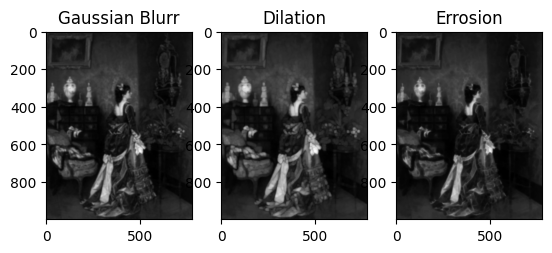

In [22]:
kernel = np.ones((5,5), np.uint8)
#Thus line of code creates a 5x5 matrix with a np.uint8 datatype filled with 1s.
#we used this because we want to structure the kernel in a morphological operation.

dilation = cv2.dilate(img_blur,kernel,iterations = 1)
#This line of code expands the bright parts of the image.
#It also  makes features like edges or white areas of the image to be wider.
#The iteration=1 means that dilation is only applied once.

erosion = cv2.erode(img_blur,kernel,iterations = 1)
#This line of code shrinks the white region of the image.
#It also removes small noises in the image while making bright areas thinner.
#The iteration=1 means that erosion is only applied once.

fig, ax = plt.subplots(1, 3)
#This line of code creates a 1x3 table of subplots to prepare a space for 3 images to show.
#fig is the container of the image that holds all the subplots.
#ax is the 3 subplots meaning one for each image.

ax[0].set_title('Gaussian Blurr')
#This line of code adds a title on the uppermost part of the image in the index[0] of the subplot,
#We used this to label the image to avoid confusion in preprocessing.

ax[1].set_title('Dilation')
#This line of code adds a title on the uppermost part of the image in the index[1] of the subplot,
#We used this to label the image to avoid confusion in preprocessing.

ax[2].set_title('Errosion')
#This line of code adds a title on the uppermost part of the image in the index[2] of the subplot,
#We used this to label the image to avoid confusion in preprocessing.

ax[0].imshow(img_blur, cmap='gray')
#We used this to confirm if the Gaussian Blur is applied to the image. As we can see,
#the image is blurred our resulting into a smoother texture.
#We also used this code to store the Gaussian Blurr to the index[0] of the subplot.
#This line of code also loads and shows the image to the screen.

ax[1].imshow(dilation, cmap = "gray")
#We used this to confirm if the Dilation is applied to the image. As we can see,
#features like edges and white areas became wider.
#We also used this code to store the Gaussian Blurr to the index[1] of the subplot.
#This line of code also loads and shows the image to the screen.

ax[2].imshow(erosion, cmap = "gray")
#We used this to confirm if the erosion is applied. As we can see,
#bright areas became thinner and less noticeable.
#We also used this code to store the Gaussian Blurr to the index[2] of the subplot.
#This line of code also loads and shows the image to the screen.

# Explain the difference between erosion and dilation. How would applying these operations in sequence (e.g., erosion then dilation, or dilation then erosion) affect the image?
- Erosion decreases bright parts of the image by eroding its bounderies
- Dilation is the opposite as it expands the bright parts of the image as it adds pixels to its bounderies
- The effect of Erosion is that it removes noise to the image since it shrinks and it thins down bright objects
- The effect of Dilation is that it fills the missing gaps, makes the object ticker. This is important for connecting nearby regions
  
# What are "opening" and "closing" operations?
- Opening is applying erosion first before dilation
   - It removes those white noises that are small
   - It also makes the large white areas of an image whole
   - It affects the image as the small white peices that are scattered around the image dissappear.
- Closing is applying Dilation first before Erosion
   - It fills up the  small blac holes of the image which is mostly inside the white region
   - It affects the image as the small black dots the is inside the image would disapper.

,Coorrdinates,Size
0,"(245.84434509277344, 948.9166870117188)",11.665843
1,"(354.4701232910156, 967.6702270507812)",78.619377
2,"(328.0974426269531, 924.9876708984375)",15.943285
3,"(353.5830383300781, 916.2857055664062)",14.595271
4,"(499.0223083496094, 838.1863403320312)",14.550564
5,"(433.5857849121094, 849.2919311523438)",52.506222
6,"(176.33279418945312, 754.1193237304688)",45.549732
7,"(472.7190856933594, 743.0869750976562)",16.035139
8,"(399.51885986328125, 750.4434204101562)",15.811423
9,"(239.4166717529297, 743.44091796875)",12.235443


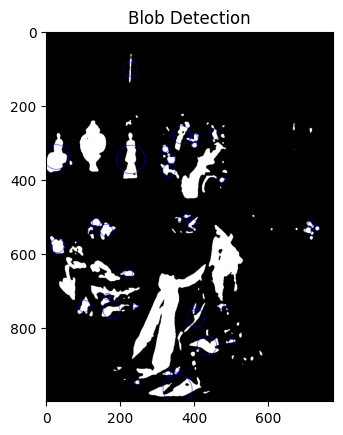

In [23]:
params = cv2.SimpleBlobDetector_Params()
#To start using CV2 for detecting blobs, we first need to create a Simple Blob Detector Parameter Object.
#The parameter object contains all the configurations and option that we will use for the detector itself.

image_to_blob = thresh_otsu.copy()
#We then specify an image to use for the blob detection and copy that.
#We will use the Otsu's Method image because out of all the binary images, it has the more distinct shapes.

params.filterByArea = True
#Here we enable filtering the blobs by their area in pixels.
#This helps remove any blobs too small that might just be noise.

params.minArea = 100
#Here we set the minimum area of the blobs in pixels.
#With the size of the image of around 700 x 1000 pixels, a 100 pixel area is a 
#reasonably small enough size for relevant shapes.

params.filterByColor = True
#Here we set filtering blobs based on their color, specifically their intensity in the grayscale.
#We need this option on because this is a binary image, we need to distinguish white blobs from black blobs

params.blobColor = 255
#We set the blob color filttr to only consider white blobs.
#This is because in the Otsu image we got, most of the distinct shapes are white

params.filterByCircularity = False
#We disable the circularity filtering here so we can detect blobs of any shape.
#Circularity measures how close the blob is from being a perfect circle.

params.filterByConvexity = False
#We disable convexity filtering here so we can allow blobs with cave ins and indents on the edges.
#Convexity measures the blobs contour to the convex shape that holds it (it's convex hull).

params.filterByInertia = False
#We disable filtering by inertia, which indicates its elongation.
#The inertia ratio measures how stretched or how linear the blob is.

detector = cv2.SimpleBlobDetector_create(params)
#The detector is created here using the parameters we just set up.
#This is the actual object that will scan the image for the blobs.

keypoints = detector.detect(image_to_blob)
#Here we detect the blobs from the image and store them in an list of keypoints.
#Each of the keypoints is an object containing all data of the keypoint, important to us is the coordinate and the size.

img_with_keypoints = cv2.drawKeypoints(image_to_blob, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#Here we draw the otsu image and overlay it with the keypoints using blue circles.
#This is useful so we can visually verify where the blobs are in the image.

plt.title('Blob Detection')
#Before we actually display the image itself we set its title.
#We set the title of the Image using matplotlib here.

plt.imshow(img_with_keypoints, cmap = "gray")
#This line of code displays the image using the imshow function.
#We did this because this is a binary image, we use cmap gray to accurately display it
#given the data in the image object.

keypoint_data = []
#We initialize an array to store data about the keypoints that we need.
#This will be used to display it as a table as using the keypoints aren't enough
#because they are python objects.

for keypoint in keypoints:
#This is used to loop through every detected blob in the array.
#Each of the keypoints (or blob) holds all the data, we will then filter out the data that we need.
    
    data = {}
    #We create an empty dictionary for the data here.
    #We will store both the coordinates and size here.
    
    data["Coorrdinates"] = keypoint.pt
    #This gets the (x,y) corrdinates of the blob as a tuple.
    #We then store it in the data dictionary in the Coordinates key.
    
    data["Size"] = keypoint.size
    #This gets size of the blob in terms of its diameter in pixels.
    #We then store it in the data dictionary in the Size key.
    
    keypoint_data.append(data)
    #We then add it to the keypoint data list we made earlier.
    #After the loop, we will have a list of all the keypoints' size and coordinates.

keypoint_data = pd.DataFrame(keypoint_data)
#We convert the list into a pandas Dataframe in this line.
#We do that so it can be viewed as a table.

keypoint_data
#This line displays the data frame in tabular form.
#We did this to know the location of the blobs and its relaltive size in the image.

,Perimeter,Aspect Ratio,Extent,Solidity,Diameter,Orientation
0,451.102592,2.679245,0.409115,0.700011,62.612336,78.595322
1,235.622363,1.951220,0.505793,0.766459,45.959813,93.023659
2,394.333041,3.142857,0.311328,0.472553,46.878689,87.033157
3,1294.170695,0.641935,0.306614,0.591834,155.188034,22.571737
4,298.735061,1.421053,0.373619,0.709731,46.865107,122.482048
5,437.504615,0.637931,0.327703,0.536730,59.846661,13.299362
6,700.440687,0.448780,0.471792,0.700878,106.439116,177.414719
7,536.801076,0.796053,0.295862,0.637663,83.236608,34.356632
8,290.450791,0.537736,0.520357,0.828786,63.269781,11.008144
9,323.379723,0.304000,0.575053,0.812584,58.973331,1.518404


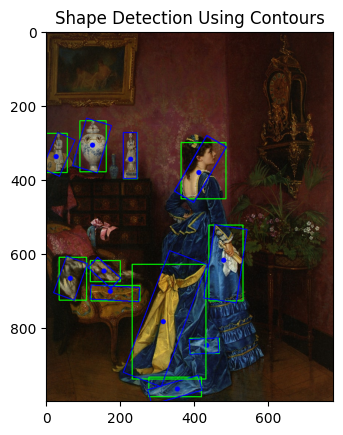

In [24]:
img_box = img.copy()
#We create a copy of the original image here.
#We only use this so we have something we can overlay on in the final output

new_img = img_blur.copy()
#The blurred image is copied in this line
#This is the image we will actually be manipulating
ret, new_otsu = cv2.threshold(new_img, 0, 255, cv2.THRESH_OTSU)
#We apply Otsu' thresholding on the blurred image
#We use this method as it's shapes more describe the general shapes of the 
#larger shapes in the image

contours, hierarchy = cv2.findContours(new_otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#We then find the contours in the Thresholded image
#The Contours are all the closed shapes it can detect in the image
#The hierarchy is the relationship of the contours in relation to each other

AREA_THRESH = 1500
#We then filter out the contours based on their size
#After this small contours will be filtered out leaving only larger more 
#relevant shapes

features = []
#We then initialize an empty array for the features
#Here we will store each of the information we need from each of the contours

for contour in contours:
#We start iterating through all the contours here.
#The contour itself are list of points outlining the shape
    area = cv2.contourArea(contour)
    #Here we get the size of the area enclosed by the contour
    #We use this to filter out small contours
    if area > AREA_THRESH:
    #Here we use the AREA THRESH variable we made earlier to filter
    #out smaller contours
    #From here on out, we will only be processing relatively large shapes
        moment = cv2.moments(contour)
        #Here we get the moment of the contour.
        #Image Moments are average values from the single pixels' intensities of an image
        #We mostly use moments to derive other values of a shape
        center_x, center_y = int(moment['m10']/moment['m00']), int(moment['m01']/moment['m00'])
        #Here we use the moment to calculate the center or centroid of the shape
        #This is how we derive values like these using the moments, using equations 
        #using the averages denoted by Mxx
        
        cv2.circle(img_box, (center_x, center_y), 7, (0, 0, 255), -1)
        #We draw a red dot in the center of the shape here.
        #We use the coordinates derived from the previous line and draw the dot there
        
        rect_x, rect_y, rect_w, rect_h = cv2.boundingRect(contour)
        #Here we get the coordinates of the bounding rectangle.
        #The bounding rectangle is axis aligned meaning its always a non-rotated rectangle
        min_rect = cv2.minAreaRect(contour)
        #Here we get the smallest rectangle that can bound the shape
        #This rectangle, unlike the previous one CAN be rotated
        img_box = cv2.rectangle(img_box, (rect_x, rect_y), (rect_x + rect_w, rect_y + rect_h), (0, 255, 0), 2)
        #Here we draw the larger rectanle as a Green Box
        #We plug in the coordinates of the upper left point, and the bottom right as well as the thickness as the parameters
        min_box = cv2.boxPoints(min_rect)
        #We then convert the rotated rectangle in the an object containing its corners
        #The new min_box object is the set of 4 points of the rectangle
        min_box = min_box.astype(np.intp)
        #The data in min_box is floating point, but we need it as an integer.
        #So we convert it first to an integer using numpy.
        cv2.drawContours(img_box, [min_box], 0, (0,0,255), 2)
        #We then draw the rotated rectangle onto the image.
        #Now we have both a green rectangle and a blue rectangle representing the object we detected
        
        feature = {}
        #Now we store the features we can derive from the contour.
        #We first initialize a dictionary to store the feature data
        feature["Perimeter"] = cv2.arcLength(contour, True)
        #The prerimeter of the object is stored using the arc length function
        #This is helpful in identifying the shapes and detecting any irregular outlines
        feature["Aspect Ratio"] = rect_w/rect_h
        #The aspect ratio is calculated using the original unrotated rectangle
        #It is calculated using the ratio of the width and the height of the rectangle
        feature["Extent"] = float(area) / (rect_w * rect_h)
        #The extent is the ratio of the contour's area with the are of the bounding box
        #It's essentially a measure of how much the contour actually fills the bounding box
        hull = cv2.convexHull(contour)
        #We then get the convex hull of the shape
        #The convex hull is the smallest shape that is rounded outward that can fill the shape
        hull_area = cv2.contourArea(hull)
        #Right now we only have a set of points of the convex hull not the area.
        #So we use the same function the calculate contour area to calculate the hull area
        feature["Solidity"] = float(area) / hull_area if hull_area > 0 else 0
        #We then calculate the solidity using the ratio of the contour area with the hull area
        #Similar to earlier this is basically how much the contour fills the hull
        feature["Diameter"] = np.sqrt(4 * area / np.pi).item()
        #We then calculate the diameter using the inverse of the formula for area
        #Here we assume that the area of the contour is a circle, and then calculate the diameter
        #as if it is
        
        angle = None
        #Now we want to calculate the angle of the of the shape
        #We first initialize an angle variable to store the data if it exists
        if len(contour) >= 5:
        #The algorithm we will use will only work if it has enough points.
        #So we filter out contours with less than 5 points, all other contours will have an angle with
        #null value
            ellipse = cv2.fitEllipse(contour)
            #First we calculate a fitted ellipse for the contour similar to when we calculated the min rectangle
            #We will use that ellipse to get the angle value
            feature["Orientation"] = ellipse[2]
            #We index the ellipse with its third element and obtain its orientation
            #The ellipse is a fitted rectangle that the ellipse is inscribed on 
            #Other values for the ellipse are its size and center

        features.append(feature)
        #We then add it to the keypoint data list we made earlier.
        #After the loop, we will have a list of all the keypoints' size and coordinates
features = pd.DataFrame(features)
#We convert the list into a pandas Dataframe in this line
#We do that so it can be viewed as a table.

plt.title('Shape Detection Using Contours')
# Before we actually display the image itself we set itsle.
# We set the title of the Image using matplotlib here. 

plt.imshow(img_box)
#We then show the image using im_show
#For every iteration of the loop we add a single contour 
#So at the end we will get an image with all the features.
features
#this line of code displays the dataframe.
#As we can see, the data is displayed below and is in tabular form.

# References
- GeeksforGeeks. (2019, August 2). cv2.imread() method Python OpenCV. GeeksforGeeks. https://www.geeksforgeeks.org/python/python-opencv-cv2-imread-method/
- GeeksforGeeks. (2021, August 12). Difference between Dilation and Erosion. GeeksforGeeks. https://www.geeksforgeeks.org/computer-vision/difference-between-dilation-and-erosion/
- Jian Wei Tay. (2020, September 21). Otsu’s method [Video]. YouTube. https://www.youtube.com/watch?v=jUUkMaNuHP8
- Moments in image processing. (n.d.). https://docs.baslerweb.com/visualapplets/files/manuals/content/examples%20imagemoments.html
- Murzova, A., & Seth, S. (2020, August 5). Otsu’s Thresholding Technique | Learn OpenCV. LearnOpenCV. https://learnopencv.com/otsu-thresholding-with-opencv/
- OpenCV: Canny Edge Detection. (n.d.). https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
- OpenCV. (n.d.). OpenCV: Image Thresholding. Docs.opencv.org. https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
- OpenCV: Smoothing Images. (n.d.). Docs.opencv.org. https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html